# Optimizing Models

This notebook pulls in the model from the SpyPlane-RandomForestClassifier.ipynb notebook and optimizes the random forest model created there.

This projects is based off the Buzzfeed news article on identifying spy planes found [here](https://www.buzzfeednews.com/article/peteraldhous/hidden-spy-planes), using the data and code adapted from their github repository [here](https://github.com/BuzzFeedNews/2017-08-spy-plane-finder).

## Instructions

Follow the directions in any cell that does not contain code. If a cell does contain code, run this before moving on to the next cell

In [1]:
%matplotlib inline
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#sci-kit learn is a library with machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#package for saving our ML model
import pickle

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load Data and Train Model

Repeat the data formatting steps from the previous notebooks.

In [2]:
#read in data
planes_labeled = pd.read_csv("/mnt/data/planes_labeled.csv")

#format data by removing non-numeric columnns and factorize the class
X = planes_labeled.drop(['adshex','class', 'type'], axis = 1)
y = pd.factorize(planes_labeled['class'])[0]

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Hyperparameters

Hyperparameters can be thought of as the settings of an algorithm that can be adjusted to optimize performance. These are something you will set before training the model. You are unlikely to know what the best settings for these will be ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.

In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. Scikit-Learn implements default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. 

Below, we can see the default parameters that were used in our above model:

We can see the effects of altering hyperparameters by increasing the number of estimators (a.k.a the number of decision trees) on the compute time, precision, and recall:

In [3]:
%%time
#try model with different parameter for number of trees (default of 10)
np.random.seed(415)
spy_model = RandomForestClassifier(n_estimators = 10)
spy_model.fit(X_train,y_train)

#calculate predictions on test set
predictions = spy_model.predict(X_test)

#metrics
precision = metrics.precision_score(y_true = y_test, y_pred = predictions)
recall = metrics.recall_score(y_true = y_test, y_pred = predictions)
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = predictions)
print('Precision: ' + str(precision) + ' Recall: ' + str(recall) + 
      ' Accuracy: ' + str(accuracy))

Precision: 0.8695652173913043 Recall: 0.6666666666666666 Accuracy: 0.9261363636363636
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 16.1 ms


In [4]:
%%time
#try model with different parameter for number of trees (100)
np.random.seed(415)
model_higher_n = RandomForestClassifier(n_estimators = 100)
model_higher_n.fit(X_train,y_train)

#calculate predictions on test set
predictions_higher_n = model_higher_n.predict(X_test)

#metrics
precision_higher_n = metrics.precision_score(y_true = y_test, y_pred = predictions_higher_n)
recall_higher_n = metrics.recall_score(y_true = y_test, y_pred = predictions_higher_n)
accuracy_higher_n = metrics.accuracy_score(y_true = y_test, y_pred = predictions_higher_n)
print('Precision: ' + str(precision_higher_n) + ' Recall: ' + str(recall_higher_n) + 
      ' Accuracy: ' + str(accuracy_higher_n))

Precision: 0.9090909090909091 Recall: 0.6666666666666666 Accuracy: 0.9318181818181818
CPU times: user 124 ms, sys: 0 ns, total: 124 ms
Wall time: 137 ms


In [5]:
spy_model = RandomForestClassifier(n_estimators = 10)
print('Parameters currently in use:\n')
print(spy_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Here are a few commonly adjusted hyperparameters of random forests (See this [article](https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead) for more detail):

- `n_estimators`: Random forest models are ensembles of decision trees. N_estimators controls the number of decision trees used in the model.
     
     
- `max_features`: Random forest models randomly resample features prior to determining the best split. This determines the number of features to resample. 


- `max_depth`: Each tree in the random forest model makes multiple splits to isolate homogeneous groups of outcomes. Max_depth determines the max number of levels. 


- `min_samples_split`: Controls the minimum number of samples required to split each node. 


- `min_samples_leaf`: Much like stopping the growth of trees once a minimum number of samples per split is reached, we can set the minimum number of samples required for each leaf. 
    
    
- `bootstrap`: method for sampling data points (with or without replacement)


- `class_weight`: Weights associated with classes. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies

# Activity - Hyperparameter optimization

Pick a metric and see if you can find the hyperparameters that optimize this. Feel free to use google to research the above hyperparameters as well as others that are used in Random Forest Classifiers. Official documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

**Spoiler Alert: Don't scroll below this section in the notebook!**

In [6]:
#create your model here
np.random.seed(415)
your_optimized_model = RandomForestClassifier(n_estimators=1100, max_depth=50, max_features='sqrt', 
                               min_samples_split=4, bootstrap=False)
#fill in the hyperparameter value(s) you'd like to try

#fit your model
your_optimized_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
#get predictions from your model
your_optimized_predictions = your_optimized_model.predict(X_test)

In [8]:
#run this cell to see accuracy, precision, and recall
#feel free to look at other metrics
your_precision = metrics.precision_score(y_true = y_test, y_pred = your_optimized_predictions)
your_recall = metrics.recall_score(y_true = y_test, y_pred = your_optimized_predictions)
your_accuracy = metrics.accuracy_score(y_true = y_test, y_pred = your_optimized_predictions)
print('Precision: ' + str(your_precision) + ' Recall: ' + str(your_recall) + 
      ' Accuracy: ' + str(your_accuracy))

Precision: 0.9166666666666666 Recall: 0.7333333333333333 Accuracy: 0.9431818181818182


### Random Search Cross Validation

To check different values for these hyperparameters, we can use scikit-learn’s “RandomizedSearchCV” to define a grid of hyperparameter ranges and randomly sample from the grid, performing cross validation with each combination of values.

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 3000, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Weights associated with classes, The “balanced” mode uses the values of y to automatically adjust weights 
#inversely proportional to class frequencies
class_weight=['balanced',None]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
np.random.seed(415)
model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_rgs = RandomizedSearchCV(estimator = model, param_distributions = random_grid, scoring = 'recall',
                               n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_rgs.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] n_estimators=2587, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, class_weight=none, bootstrap=True 
[CV]  n_estimators=2587, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, class_weight=none, bootstrap=True, total=   0.0s
[CV] n_estimators=2587, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, class_weight=none, bootstrap=True 
[CV]  n_estimators=2587, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, class_weight=none, bootstrap=True, total=   0.0s
[CV] n_estimators=1673, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "none".

  FitFailedWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "none".

  FitFailedWarning)


[CV]  n_estimators=1673, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, class_weight=balanced, bootstrap=False, total=   1.6s
[CV] n_estimators=1673, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=1673, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, class_weight=balanced, bootstrap=False, total=   1.6s
[CV] n_estimators=2326, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=2326, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, class_weight=balanced, bootstrap=False, total=   2.2s
[CV] n_estimators=2326, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=2326, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, class_weight=balanced

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "none".

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "none".

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "none".

  FitFailedWarn

[CV]  n_estimators=1864, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, class_weight=balanced, bootstrap=True, total=   1.6s
[CV] n_estimators=1864, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=1864, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, class_weight=balanced, bootstrap=True, total=   1.6s
[CV] n_estimators=2376, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=2376, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, class_weight=balanced, bootstrap=False, total=   2.3s
[CV] n_estimators=2376, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=2376, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, class_weight=balanced, b

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.3s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [31]:
#look at randomized search best parameters
model_rgs.best_params_

{'n_estimators': 1673,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'class_weight': 'balanced',
 'bootstrap': False}

In [34]:
# Create a model based on the hyperparameters from the above grid search
np.random.seed(415)
model_tuned = RandomForestClassifier(n_estimators=2065, max_depth=None, max_features='log2', 
                                     min_samples_split=5, bootstrap=False, class_weight='balanced')
model_tuned.fit(X_train, y_train)

predictions_tuned = model_tuned.predict(X_test)

In [35]:
#metrics
precision_rgs = metrics.precision_score(y_true = y_test, y_pred = predictions_tuned)
recall_rgs = metrics.recall_score(y_true = y_test, y_pred = predictions_tuned)
accuracy_rgs = metrics.accuracy_score(y_true = y_test, y_pred = predictions_tuned)
print('Randomized Grid Search Metrics: Precision: ' + str(precision_rgs) + ' Recall: ' + str(recall_rgs) + 
      ' Accuracy: ' + str(accuracy_rgs))

Randomized Grid Search Metrics: Precision: 0.9583333333333334 Recall: 0.7666666666666667 Accuracy: 0.9545454545454546


### Feature Engineering

We'll look at the importance of different features in the data set on our predictions and make a visualization of these.

In [14]:
#make lists of the features (column names) and the feature importances returned from our model
features = X.columns
importances = list(model_tuned.feature_importances_)

In [15]:
#combine the names and importances and sort
feature_importance = list(zip(features, np.round(importances,2)))
feature_importance.sort(key=lambda x:x[1], reverse = True)
feature_importance

[('steer2', 0.24),
 ('steer1', 0.14),
 ('steer5', 0.1),
 ('squawk_1', 0.09),
 ('altitude3', 0.04),
 ('steer4', 0.04),
 ('duration4', 0.03),
 ('steer6', 0.03),
 ('duration1', 0.02),
 ('duration5', 0.02),
 ('boxes5', 0.02),
 ('speed1', 0.02),
 ('altitude1', 0.02),
 ('steer8', 0.02),
 ('observations', 0.02),
 ('duration2', 0.01),
 ('duration3', 0.01),
 ('boxes1', 0.01),
 ('boxes2', 0.01),
 ('boxes3', 0.01),
 ('boxes4', 0.01),
 ('speed2', 0.01),
 ('speed3', 0.01),
 ('speed4', 0.01),
 ('speed5', 0.01),
 ('altitude2', 0.01),
 ('altitude4', 0.01),
 ('altitude5', 0.01),
 ('steer3', 0.01),
 ('steer7', 0.01),
 ('flights', 0.01),
 ('type_factorized', 0.01)]

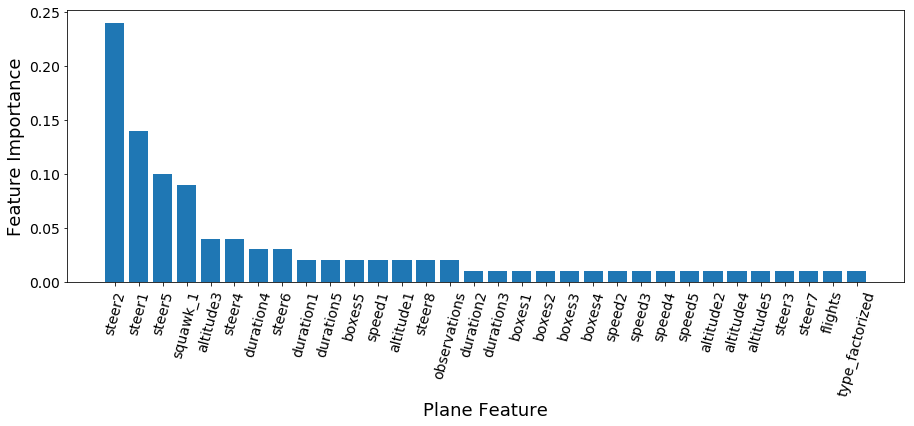

In [16]:
#plot the feature importances
features_ranked = list(zip(*feature_importance))[0]
feat_imp_ranked = list(zip(*feature_importance))[1]

fig = plt.figure(figsize = [15,5])
plt.xticks(fontsize = 14, rotation=75)
plt.yticks(fontsize = 14)
plt.xlabel('Plane Feature', fontsize = 18)
plt.ylabel('Feature Importance', fontsize = 18)
plt.bar(features_ranked, feat_imp_ranked, align='center');

Sci-kit learn's feature importance uses `MeanDecreaseGini`, which measures the extent to which each variable plays a role in partitioning the data into the defined classes.

As seen in the news article analysis, the `steer1` and `steer2` variables, quantifying the frequency of turning hard to the left, and `squawk_1`, the most common squawk code broadcast by a plane’s transponder, were the most important to the model.

# Activity 

Try training a model with a limited amout of features and see how the metrics change:

In [17]:
#add different columns based on feature importance here
X_limited = planes_labeled[['steer1', 'steer2', 'steer4', 'steer5', 'steer6', 'squawk_1', 'altitude3']]

In [18]:
#factorize the class
y = pd.factorize(planes_labeled['class'])[0]

In [19]:
#split the data into train and test sets
X_train_lim, X_test_lim, y_train, y_test = train_test_split(X_limited, y, test_size=0.3, random_state=42)

In [24]:
# Create a model based on the hyperparameters from the above grid search
np.random.seed(415)
model_tuned = RandomForestClassifier(n_estimators=1100, max_depth=50, max_features='sqrt', 
                                     min_samples_split=4, bootstrap=False, class_weight='balanced')

In [25]:
#train model with only features above
model_tuned.fit(X_train_lim, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
#predictions
predictions_tuned = model_tuned.predict(X_test_lim)

In [27]:
#metrics
precision_tuned = metrics.precision_score(y_true = y_test, y_pred = predictions_tuned)
recall_tuned = metrics.recall_score(y_true = y_test, y_pred = predictions_tuned)
accuracy_tuned = metrics.accuracy_score(y_true = y_test, y_pred = predictions_tuned)
print('Randomized Grid Search Metrics: Precision: ' + str(precision_tuned) + ' Recall: ' + str(recall_tuned) + 
      ' Accuracy: ' + str(accuracy_tuned))

Randomized Grid Search Metrics: Precision: 0.9583333333333334 Recall: 0.7666666666666667 Accuracy: 0.9545454545454546
